# Prediction of the three category of Shift with the Status

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

### import library

In [2]:
df = pd.read_csv('./Data/outDashboard2RawV3_3.csv',header=0,index_col = False)

### Retrieve raw data

In [3]:
df.head()

,Main_ID,Parameter_ID,Date_Time,Serial_Number,Status_Main,Station_ID,Station_Type,Parameter_Name,Failed_Date_Time,Failed_Measurement,Database_Name,Date_Time_Year,Date_Time_Month,Date_Time_Day,Date_Time_Hour,Date_Time_Weekday,Date_Time_WeekdayInt,Date_Time_YearWeekInt,Date_Time_Quarter,Status
0,1,3,2018-10-05 15:00:55,1840SDF00038,Passed,ST1,BLTBoard,1.8V,NaN,NaN,DaTRUE2Left,2018,10,5,15,Friday,5,40,4,Passed
1,1,4,2018-10-05 15:00:55,1840SDF00038,Passed,ST1,BLTBoard,1.35V,NaN,NaN,DaTRUE2Left,2018,10,5,15,Friday,5,40,4,Passed
2,1,5,2018-10-05 15:00:55,1840SDF00038,Passed,ST1,BLTBoard,Isc_VChrg,NaN,NaN,DaTRUE2Left,2018,10,5,15,Friday,5,40,4,Passed
3,1,6,2018-10-05 15:00:55,1840SDF00038,Passed,ST1,BLTBoard,Isc_VBAT,NaN,NaN,DaTRUE2Left,2018,10,5,15,Friday,5,40,4,Passed
4,1,7,2018-10-05 15:00:55,1840SDF00038,Passed,ST1,BLTBoard,IFAST_CHRG,NaN,NaN,DaTRUE2Left,2018,10,5,15,Friday,5,40,4,Passed


## Preprocess the data

In [4]:
df_drop = df[['Date_Time','Database_Name','Date_Time_Hour','Status']]

### In the  first processing the data,only the selected column need
    - Date_Time
    - Database_Name
    - Date_Time_Hour
    - Status

In [5]:
df_drop.head()

,Date_Time,Database_Name,Date_Time_Hour,Status
0,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
1,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
2,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
3,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
4,2018-10-05 15:00:55,DaTRUE2Left,15,Passed


In [6]:
df_Left = df_drop.loc[df_drop['Database_Name']=='DaTRUE2Left']
df_Left

,Date_Time,Database_Name,Date_Time_Hour,Status
0,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
1,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
2,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
3,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
4,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
5,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
6,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
7,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
8,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
9,2018-10-05 15:00:55,DaTRUE2Left,15,Passed


### Set the Database_Name into each of  categorization
    - DaTRUE2Left
    - DaTRUE2Right
    - DaTRUE2Charger

## Partition into 3 Working_Shift
    1. 12AM - 8AM
    2. 9AM - 4PM
    3. 5PM - 11PM

In [7]:
shift_1 = df_Left.query('-1< Date_Time_Hour < 9')
shift_1

,Date_Time,Database_Name,Date_Time_Hour,Status
18463,2018-10-08 08:32:01,DaTRUE2Left,8,Failed
18464,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18465,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18466,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18467,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18468,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18469,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18470,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18471,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18472,2018-10-08 08:32:01,DaTRUE2Left,8,Passed


### 12AM - 8AM

In [8]:
shift_2 = df_Left.query('8 < Date_Time_Hour < 17')
shift_2

,Date_Time,Database_Name,Date_Time_Hour,Status
0,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
1,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
2,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
3,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
4,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
5,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
6,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
7,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
8,2018-10-05 15:00:55,DaTRUE2Left,15,Passed
9,2018-10-05 15:00:55,DaTRUE2Left,15,Passed


### 9AM - 4PM

In [9]:
shift_3 = df_Left.query('16 < Date_Time_Hour < 24')
shift_3

,Date_Time,Database_Name,Date_Time_Hour,Status
5355,2018-10-05 17:11:04,DaTRUE2Left,17,Passed
5356,2018-10-05 17:11:04,DaTRUE2Left,17,Passed
5357,2018-10-05 17:11:04,DaTRUE2Left,17,Passed
5358,2018-10-05 17:11:04,DaTRUE2Left,17,Passed
5359,2018-10-05 17:11:04,DaTRUE2Left,17,Passed
5360,2018-10-05 17:11:04,DaTRUE2Left,17,Passed
5361,2018-10-05 17:11:04,DaTRUE2Left,17,Passed
5362,2018-10-05 17:11:04,DaTRUE2Left,17,Passed
5363,2018-10-05 17:11:04,DaTRUE2Left,17,Passed
5364,2018-10-05 17:00:04,DaTRUE2Left,17,Passed


### 5PM - 11PM

## Partition the Shift into each of the Status
    - Passed
    - Failed
    - Error

In [10]:
Shift_1_Passed = shift_1.loc[shift_1['Status']=='Passed']
Shift_1_Passed

,Date_Time,Database_Name,Date_Time_Hour,Status
18464,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18465,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18466,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18467,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18468,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18469,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18470,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18471,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18472,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18473,2018-10-08 08:32:01,DaTRUE2Left,8,Passed


### Obtained the 1st Shift with Pass value

# Implementation of SARIMA Model
## Forecasting the Status of Pass on the Morning at Left Database

Preprocess the data a little bit more

In [11]:
Shift_1_Passed.head()

,Date_Time,Database_Name,Date_Time_Hour,Status
18464,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18465,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18466,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18467,2018-10-08 08:32:01,DaTRUE2Left,8,Passed
18468,2018-10-08 08:32:01,DaTRUE2Left,8,Passed


In [12]:
Shift_1_Passed.drop(['Database_Name','Date_Time_Hour','Status'],axis=1,inplace=True)

### Remove the column. 
    - needed only Date_Time

In [13]:
Shift_1_Passed.head()

,Date_Time
18464,2018-10-08 08:32:01
18465,2018-10-08 08:32:01
18466,2018-10-08 08:32:01
18467,2018-10-08 08:32:01
18468,2018-10-08 08:32:01


In [14]:
Shift_1_Passed['Date_Time'] = pd.to_datetime(Shift_1_Passed['Date_Time'])
Shift_1_Passed['Date_Time'].dt

### Convert the datatype

In [15]:
Shift_1_Passed = pd.Series(1,Shift_1_Passed['Date_Time']).resample('D',how='sum')

### List all the unique Date_Time that occur between the initial and the end of the period with the frequency count happens in the Date_Time with transaction

In [16]:
Shift_1_Passed

Date_Time
2018-10-08       96
2018-10-09        0
2018-10-10        0
2018-10-11        0
2018-10-12        0
2018-10-13        0
2018-10-14        0
2018-10-15        0
2018-10-16        0
2018-10-17        0
2018-10-18        0
2018-10-19        0
2018-10-20        0
2018-10-21        0
2018-10-22        0
2018-10-23        0
2018-10-24       14
2018-10-25        0
2018-10-26        0
2018-10-27        0
2018-10-28        0
2018-10-29        0
2018-10-30        0
2018-10-31      589
2018-11-01      839
2018-11-02        0
2018-11-03        0
2018-11-04        0
2018-11-05        0
2018-11-06        0
              ...  
2019-03-21    22611
2019-03-22     9390
2019-03-23        0
2019-03-24        0
2019-03-25     5108
2019-03-26    21046
2019-03-27    17103
2019-03-28    19720
2019-03-29     8305
2019-03-30        0
2019-03-31        0
2019-04-01     3274
2019-04-02     9164
2019-04-03     7326
2019-04-04        0
2019-04-05        0
2019-04-06        0
2019-04-07        0
2019-04-08

In [ ]:
out = Shift_1_Passed.to_csv('./Data/Shift_1_Passed.csv',header=None) 

### Export to the csv for the record

In [18]:
Shift_1_Passed = pd.read_csv('./Data/Shift_1_Passed.csv',header=None) 
Shift_1_Passed.columns = ['Date_Time','Shift_1_Passed']
Shift_1_Passed.head()

,Date_Time,Shift_1_Passed
0,2018-10-08,96
1,2018-10-09,0
2,2018-10-10,0
3,2018-10-11,0
4,2018-10-12,0


In [19]:
Shift_1_Passed['Date_Time'] = pd.to_datetime(Shift_1_Passed['Date_Time'])
Shift_1_Passed['Date_Time'].dt

### Preprocess : Convert dtypes (initially in strings)

In [20]:
Shift_1_Passed.set_index('Date_Time',inplace=True)

### Replace the index with the designated Date_Time

# Model Implementation

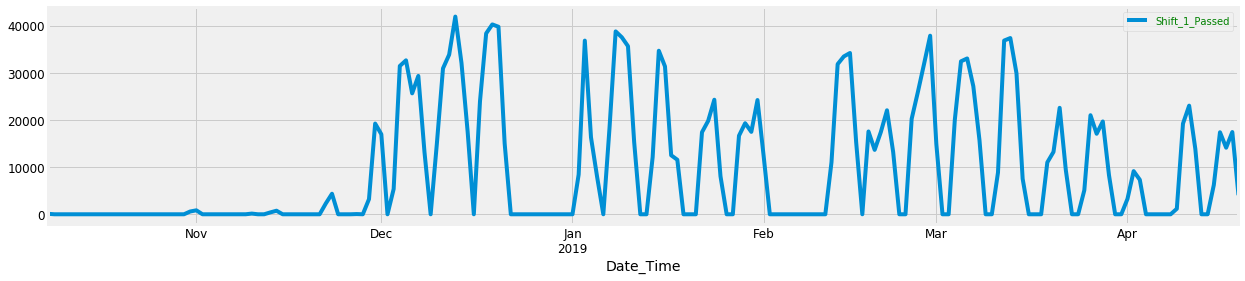

In [21]:
Shift_1_Passed.plot(figsize=(19, 4))
plt.show()

### Analyzing the chart, we can observe that the time-series has seasonality pattern

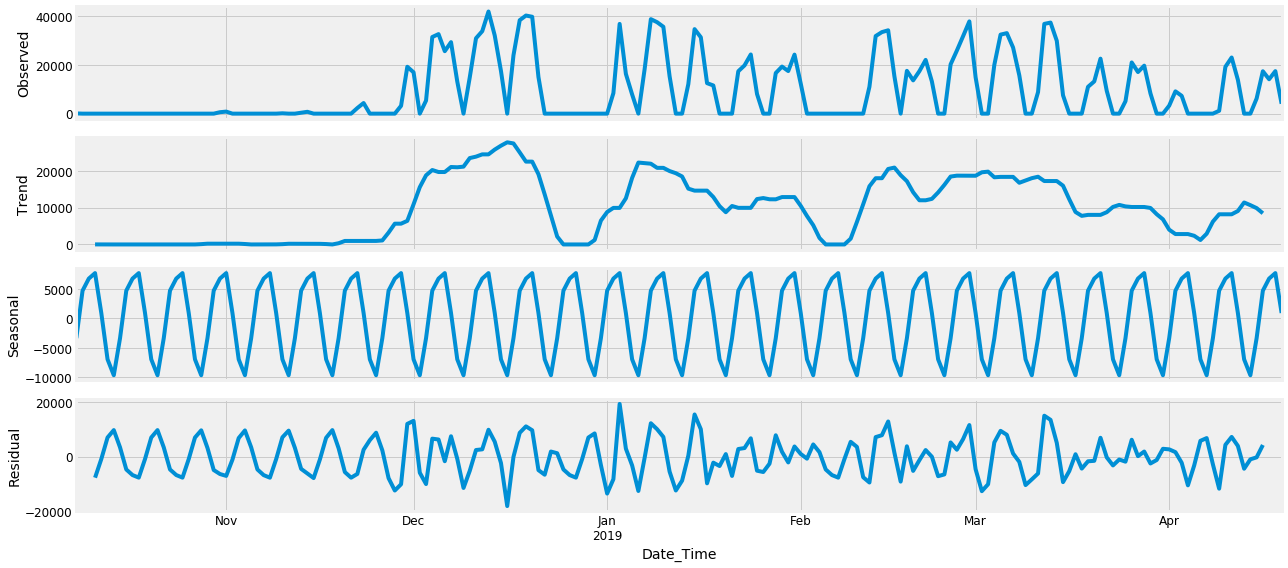

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(Shift_1_Passed, model='additive')
fig = decomposition.plot()
plt.show()

### Using the “sm.tsa.seasonal_decompose” command from the pylab library we can decompose the time-series into three distinct components: trend, seasonality, and noise.

In [49]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in 
                list(itertools.product(p,d,q))]
print('Examples of parameter for SARIMA....')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter for SARIMA....
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## SARIMA to time series forecasting
### Let’s use SARIMA. The models notation is SARIMA(p, d, q).(P,D,Q)m. These three parameters account for seasonality, trend, and noise in data

In [31]:
"""for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Shift_1_Passed,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility= False)
            results = mod.fit()
            print('ARIMA{}X{}12 - AIC :{}').format(param,param_seasonal,results.aic)
        except:
            continue"""
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Shift_1_Passed,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4281.083542016981
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4005.507006935976
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4056.085040360875
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3738.0826798956823
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4017.97119469117


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3977.237493383067
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3798.662672649547


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3735.8924573240174
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4110.920194132777
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3852.838961496947


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3934.7715350826024


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3630.6020754800784
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3894.403792426674


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3841.7458174980807


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3708.4929467811976


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3632.4066702132386
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4065.3618570189215
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3825.9283999664713
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:3951.0487056201127


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:3616.2490684265085
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:3844.867721183882


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:3823.838510813688
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:3698.2132450101135


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:3614.578028355293
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:4030.593691684941
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3790.708331819538
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:3910.731668326872

C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:3581.0458643825696
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:3831.044171272589


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3789.0593464795184


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:3676.504961772099


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:3582.884907637227
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:4069.1801593871596
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:3830.422754109522
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:3942.567923858129


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:3610.2201260736388
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:3830.4227622317794


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:3831.9124052551574
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:3671.878303397084


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:3612.0605731521027
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:4023.297103772795
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:3785.56921420434


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:3885.4188934145104


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:3563.6398659219167
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:3805.726060989174


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3781.6251123146512


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:3633.3428385953766


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:3565.567015700163
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:4056.661581668149
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:3817.1017046096495
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:3939.1227624696967


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:3601.7439789836935
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:3817.2239469174942


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:3815.3705185431527
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:3662.56542952696


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:3603.55488699301
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:4031.770704550895


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:3792.3153634874775
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:3912.207653164828


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:3580.79045271838
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:3812.4763289139128


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3790.078441741288


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:3656.8570246866093


C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:3582.6185616417265


### According Peterson, T. (2014) the AIC (Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. The low AIC value the better. Our output suggests that SARIMAX(1, 0, 1)x(0, 1, 1, 12) with AIC value of 3563.64 is the best combination, so we should consider this to be optimal option.

In [32]:
mod = sm.tsa.statespace.SARIMAX(Shift_1_Passed,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\amir.azmi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6039      0.144      4.199      0.000       0.322       0.886
ma.L1          0.4632      0.153      3.027      0.002       0.163       0.763
ma.S.L12      -0.9173      0.088    -10.430      0.000      -1.090      -0.745
sigma2      1.405e+08   1.07e-10   1.31e+18      0.000    1.41e+08    1.41e+08


### in the “mod = sm.tsa.statespace.SARIMAX” command we need to set up the chosen combination.

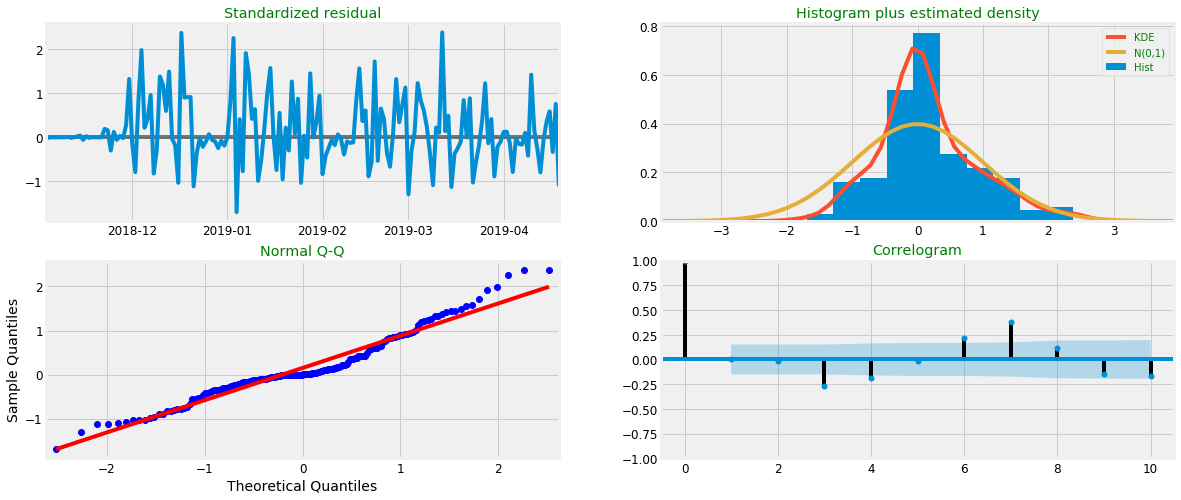

In [33]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

#### With the diagnostic above we can visualize important information as the distribution and the Auto correlation function ACF (correlogram). Values upward the “0” has some correlation over the time series data. Values near to “1” demonstrates strongest correlation.

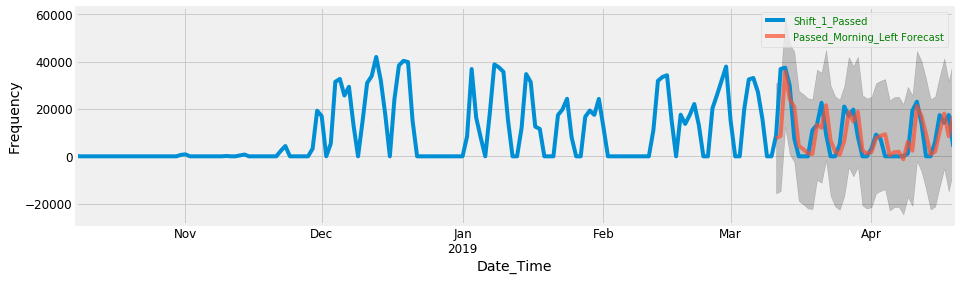

In [39]:
pred = results.get_prediction(start=pd.to_datetime('2019-03-11'), dynamic=False)
pred_ci = pred.conf_int()
ax = Shift_1_Passed['2018-10-08':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Passed_Morning_Left Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date_Time')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

#### This step consists in comparing the true values with the forecast predictions. Our forecasts fit with the true values very well. The command “pred = results.get_prediction(start=pd.to_datetime(‘2019–03–11’)” determines the period which you would forecast in comparing with the true data.

In [41]:
y_forecasted = pred.predicted_mean
y_truth = Shift_1_Passed['2019-03-11':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2019-03-11 00:00:00   NaN
2019-03-12 00:00:00   NaN
2019-03-13 00:00:00   NaN
2019-03-14 00:00:00   NaN
2019-03-15 00:00:00   NaN
2019-03-16 00:00:00   NaN
2019-03-17 00:00:00   NaN
2019-03-18 00:00:00   NaN
2019-03-19 00:00:00   NaN
2019-03-20 00:00:00   NaN
2019-03-21 00:00:00   NaN
2019-03-22 00:00:00   NaN
2019-03-23 00:00:00   NaN
2019-03-24 00:00:00   NaN
2019-03-25 00:00:00   NaN
2019-03-26 00:00:00   NaN
2019-03-27 00:00:00   NaN
2019-03-28 00:00:00   NaN
2019-03-29 00:00:00   NaN
2019-03-30 00:00:00   NaN
2019-03-31 00:00:00   NaN
2019-04-01 00:00:00   NaN
2019-04-02 00:00:00   NaN
2019-04-03 00:00:00   NaN
2019-04-04 00:00:00   NaN
2019-04-05 00:00:00   NaN
2019-04-06 00:00:00   NaN
2019-04-07 00:00:00   NaN
2019-04-08 00:00:00   NaN
2019-04-09 00:00:00   NaN
2019-04-10 00:00:00   NaN
2019-04-11 00:00:00   NaN
2019-04-12 00:00:00   NaN
2019-04-13 00:00:00   NaN
2019-04-14 00:00:00   NaN
2019-04-15 00:00:00   NaN
2019-04-16 00:00:00   NaN
2019-04-17 0

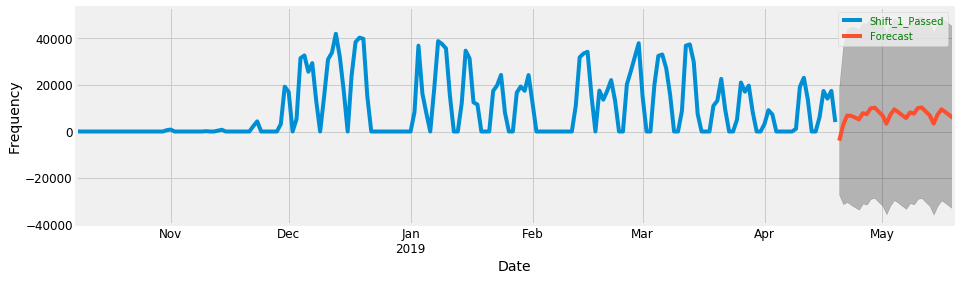

In [44]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = Shift_1_Passed.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

#### Here we forecast the sales for the next 12 days. This parameter can me modified in the line “pred_uc = results.get_forecast(steps=12)” of the code.

In [45]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

2019-03-11     7616.399552
2019-03-12     8615.500143
2019-03-13    35773.827494
2019-03-14    24155.308626
2019-03-15    20914.247153
2019-03-16     4423.167488
2019-03-17     3011.649703
2019-03-18     1253.373896
2019-03-19      981.442346
2019-03-20    13297.840206
2019-03-21    12072.329533
2019-03-22    21564.228910
Freq: D, dtype: float64

#### This step indicate the predicted values of the test we have ran before.


In [46]:
y_truth.head(12)

,Shift_1_Passed
Date_Time,
2019-03-11,8860
2019-03-12,36902
2019-03-13,37434
2019-03-14,29946
2019-03-15,7537
2019-03-16,0
2019-03-17,0
2019-03-18,0
2019-03-19,11021


#### This step indicate the truth values of the data set. We can compare the two series above to measure the model accuracy.


In [47]:
pred_ci.head(24)

,lower Shift_1_Passed,upper Shift_1_Passed
2019-04-20,-27183.505880,19318.264690
2019-04-21,-31208.983197,36772.032993
2019-04-22,-30292.648435,43991.800203
2019-04-23,-31494.546193,44960.104011
2019-04-24,-32564.322391,44666.685762
2019-04-25,-33561.654574,43950.601115
2019-04-26,-30929.905391,46684.693715
2019-04-27,-31377.731981,46274.141057
2019-04-28,-28872.978576,48792.518121
2019-04-29,-28573.182708,49097.201957


In [48]:
forecast = pred_uc.predicted_mean
forecast.head(30)

2019-04-20    -3932.620595
2019-04-21     2781.524898
2019-04-22     6849.575884
2019-04-23     6732.778909
2019-04-24     6051.181686
2019-04-25     5194.473270
2019-04-26     7877.394162
2019-04-27     7448.204538
2019-04-28     9959.769772
2019-04-29    10262.009624
2019-04-30     8563.448333
2019-05-01     6927.901131
2019-05-02     3383.583139
2019-05-03     7200.129297
2019-05-04     9518.181837
2019-05-05     8344.477330
2019-05-06     7024.563236
2019-05-07     5782.344816
2019-05-08     8232.437829
2019-05-09     7662.632343
2019-05-10    10089.272951
2019-05-11    10340.222771
2019-05-12     8610.684983
2019-05-13     6956.429597
2019-05-14     3400.812840
2019-05-15     7210.535136
2019-05-16     9524.466419
2019-05-17     8348.272889
2019-05-18     7026.855555
2019-05-19     5783.729257
Freq: D, dtype: float64